In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import random

c:\Users\amrar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("avocado.csv")
df.head(4)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


In [3]:
for i in df.columns:
    if df[i].nunique() < 2:
        df.drop(i,axis=1,inplace=True)
        print(f"{i} column is dropped from the dataframe")

In [4]:
df.sort_values("Date",inplace=True)

In [5]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


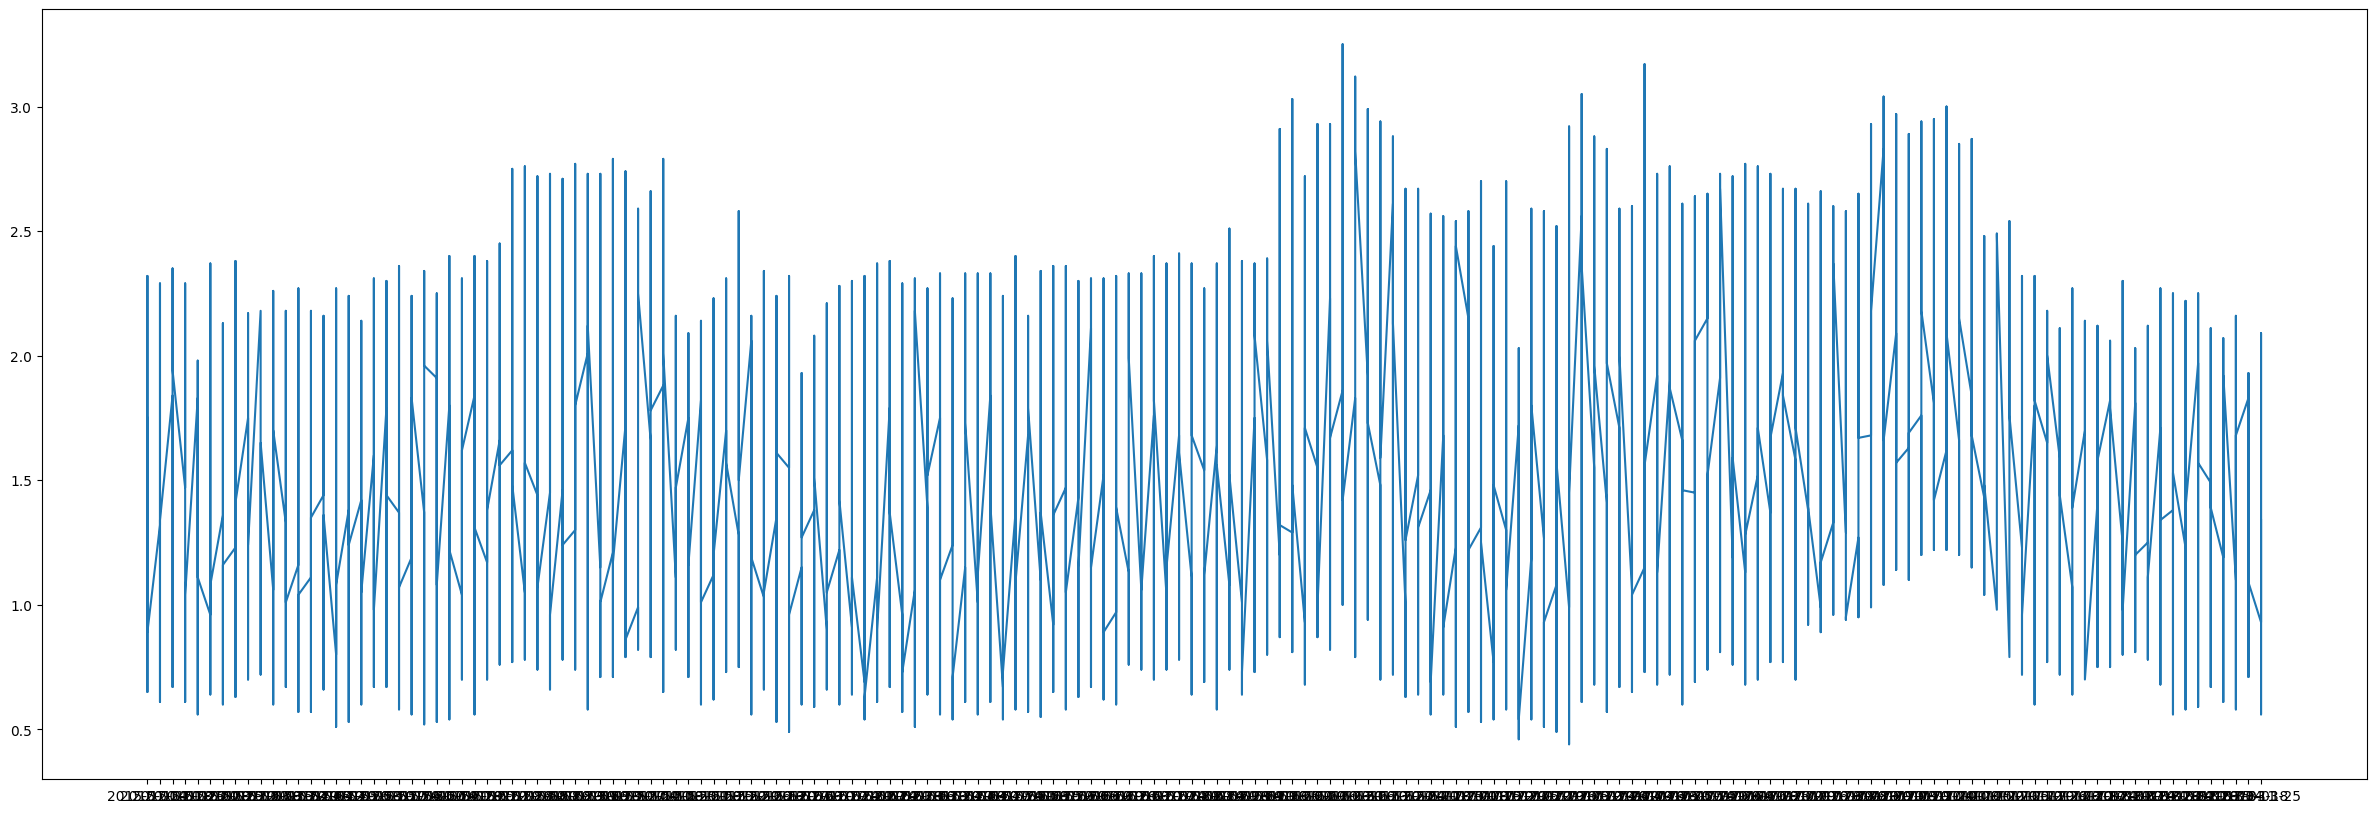

In [6]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'],df['AveragePrice'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0,

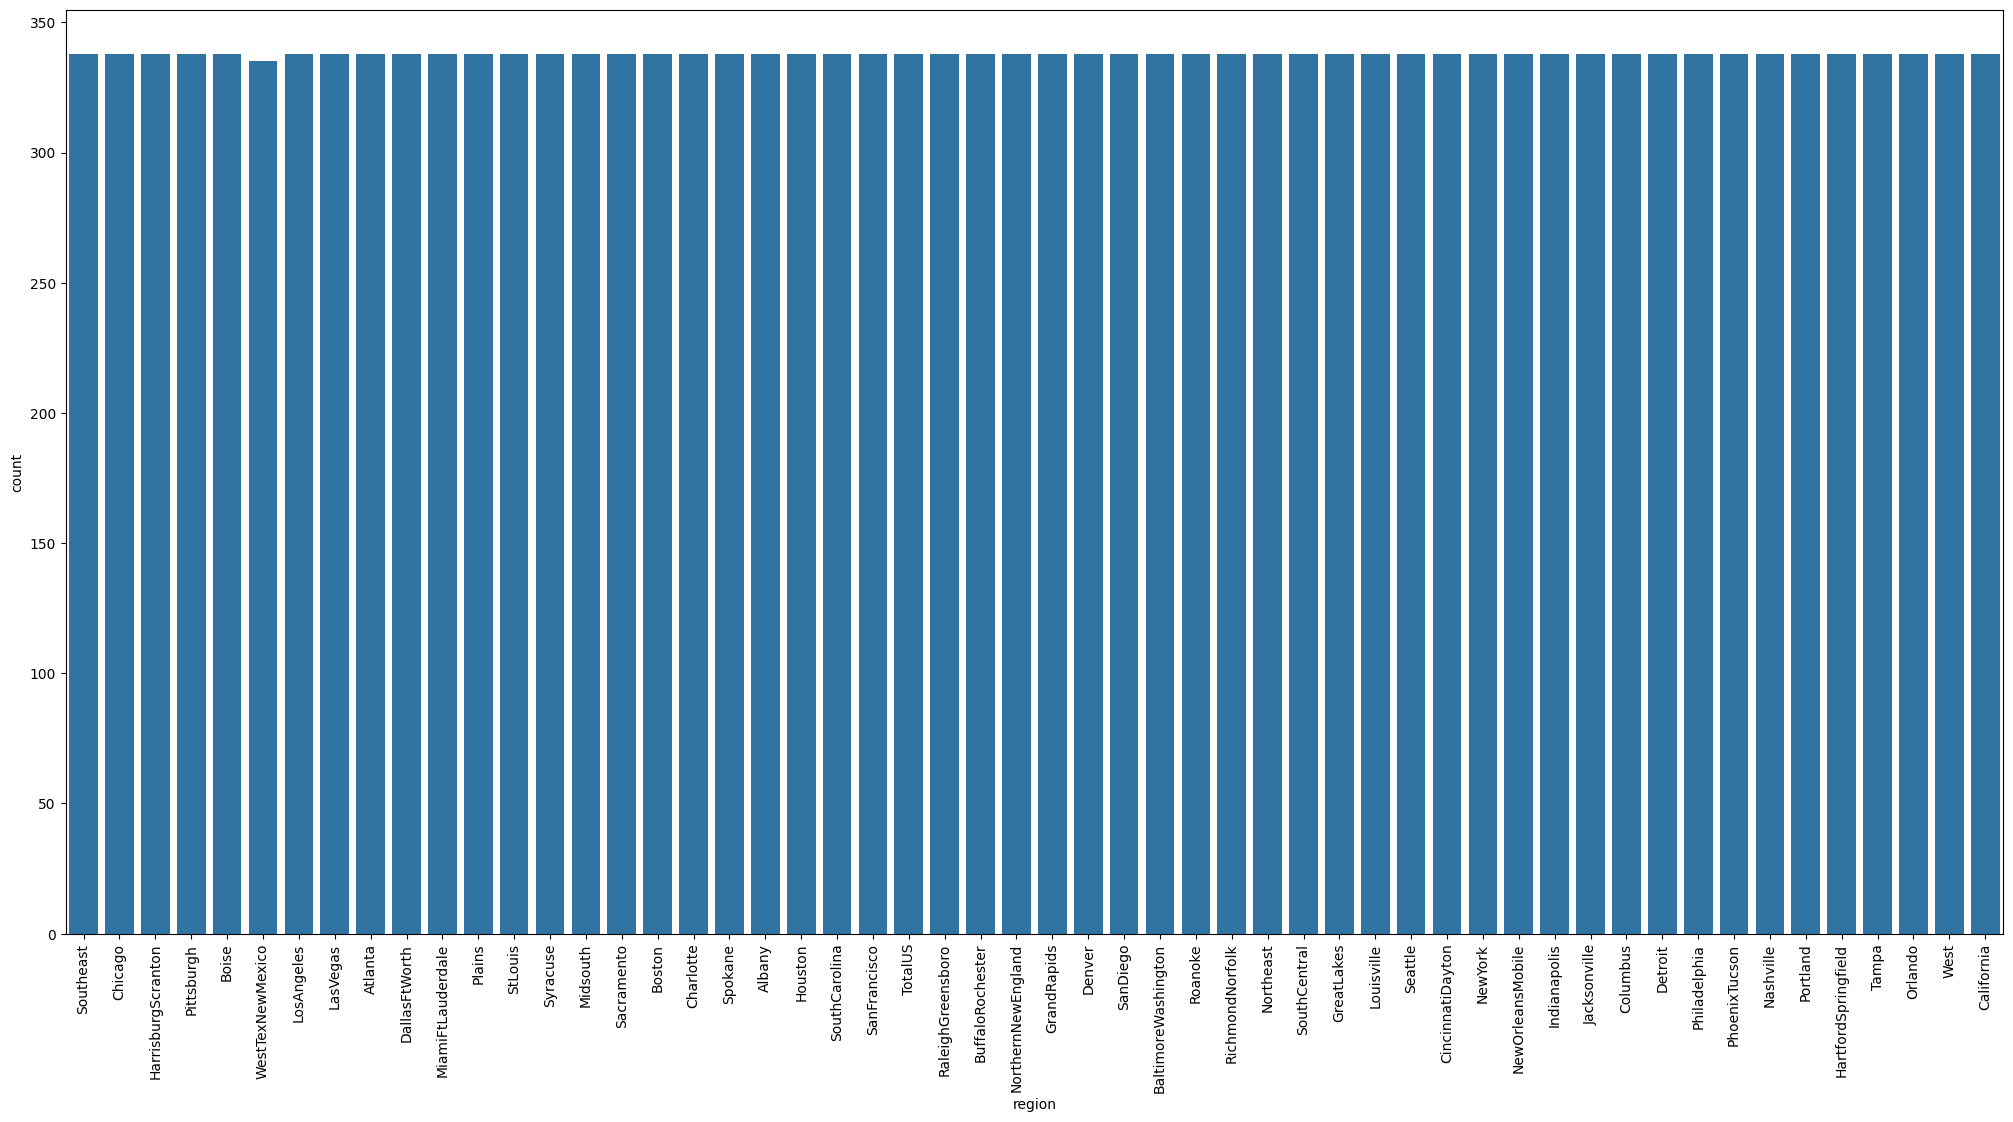

In [7]:
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='year', ylabel='count'>

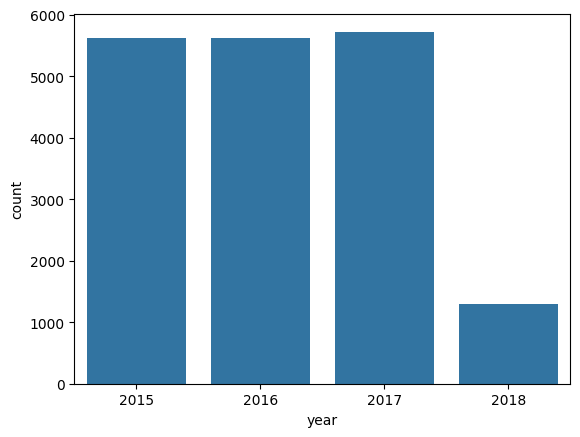

In [8]:
sns.countplot(x='year',data=df)

In [ ]:
avocado_prophet = df[['Date','AveragePrice']]
avocado_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [10]:
avocado_prophet.rename(columns={"Date":'ds',"AveragePrice":'y'},inplace=True)
avocado_prophet

C:\Users\amrar\AppData\Local\Temp\ipykernel_10220\1633000119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_prophet.rename(columns={"Date":'ds',"AveragePrice":'y'},inplace=True)


,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [11]:
m = Prophet()

In [12]:
m.fit(avocado_prophet)

00:31:33 - cmdstanpy - INFO - Chain [1] start processing
00:31:45 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500304,0.903663,1.846297,1.500304,1.500304,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,0.0,0.0,0.0,1.382394
1,2015-01-11,1.494981,0.924133,1.873985,1.494981,1.494981,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,0.0,0.0,0.0,1.385583
2,2015-01-18,1.489658,0.876755,1.849625,1.489658,1.489658,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,0.0,0.0,0.0,1.380713
3,2015-01-25,1.484335,0.894122,1.847045,1.484335,1.484335,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,0.0,0.0,0.0,1.356655
4,2015-02-01,1.479011,0.887189,1.825651,1.479011,1.479011,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,0.0,0.0,0.0,1.323352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167023,0.531073,1.620985,0.968907,1.379326,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,0.0,0.0,0.0,1.080679
530,2019-03-22,1.166297,0.576423,1.612846,0.967108,1.379146,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,0.0,0.0,0.0,1.081751
531,2019-03-23,1.165571,0.556898,1.648196,0.965007,1.378965,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,0.0,0.0,0.0,1.083100
532,2019-03-24,1.164845,0.557142,1.627719,0.962991,1.378784,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,0.0,0.0,0.0,1.084708


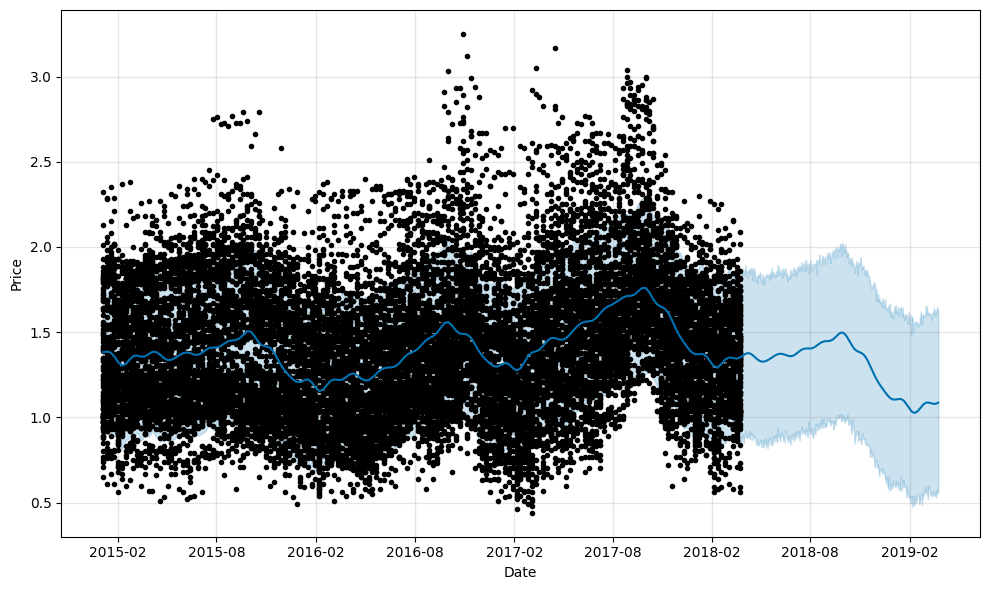

In [15]:
figure = m.plot(forecast,xlabel='Date',ylabel="Price")

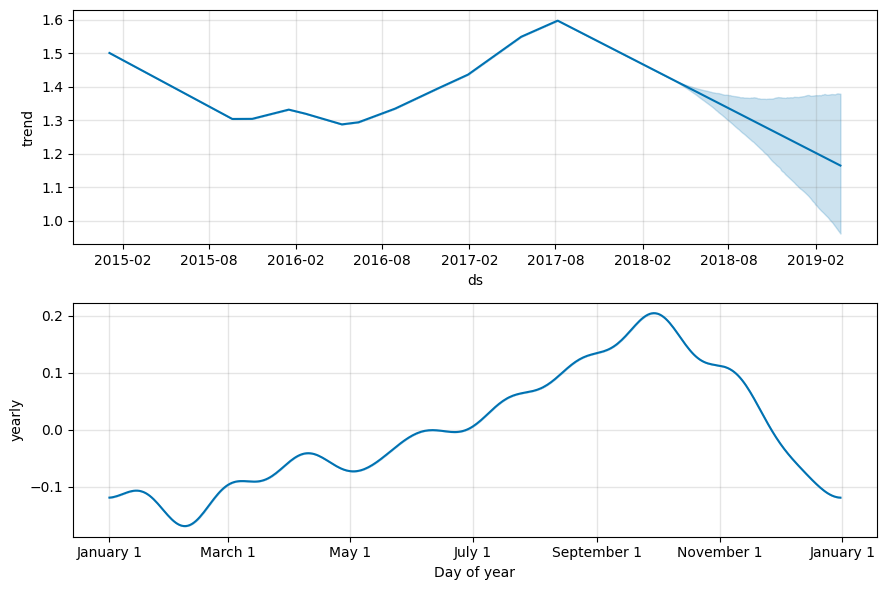

In [16]:
figure = m.plot_components(forecast)

In [17]:
df_wst = df[df['region']=='West'].rename(columns={"Date":'ds',"AveragePrice":'y'})
df_wst.head(4)

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West


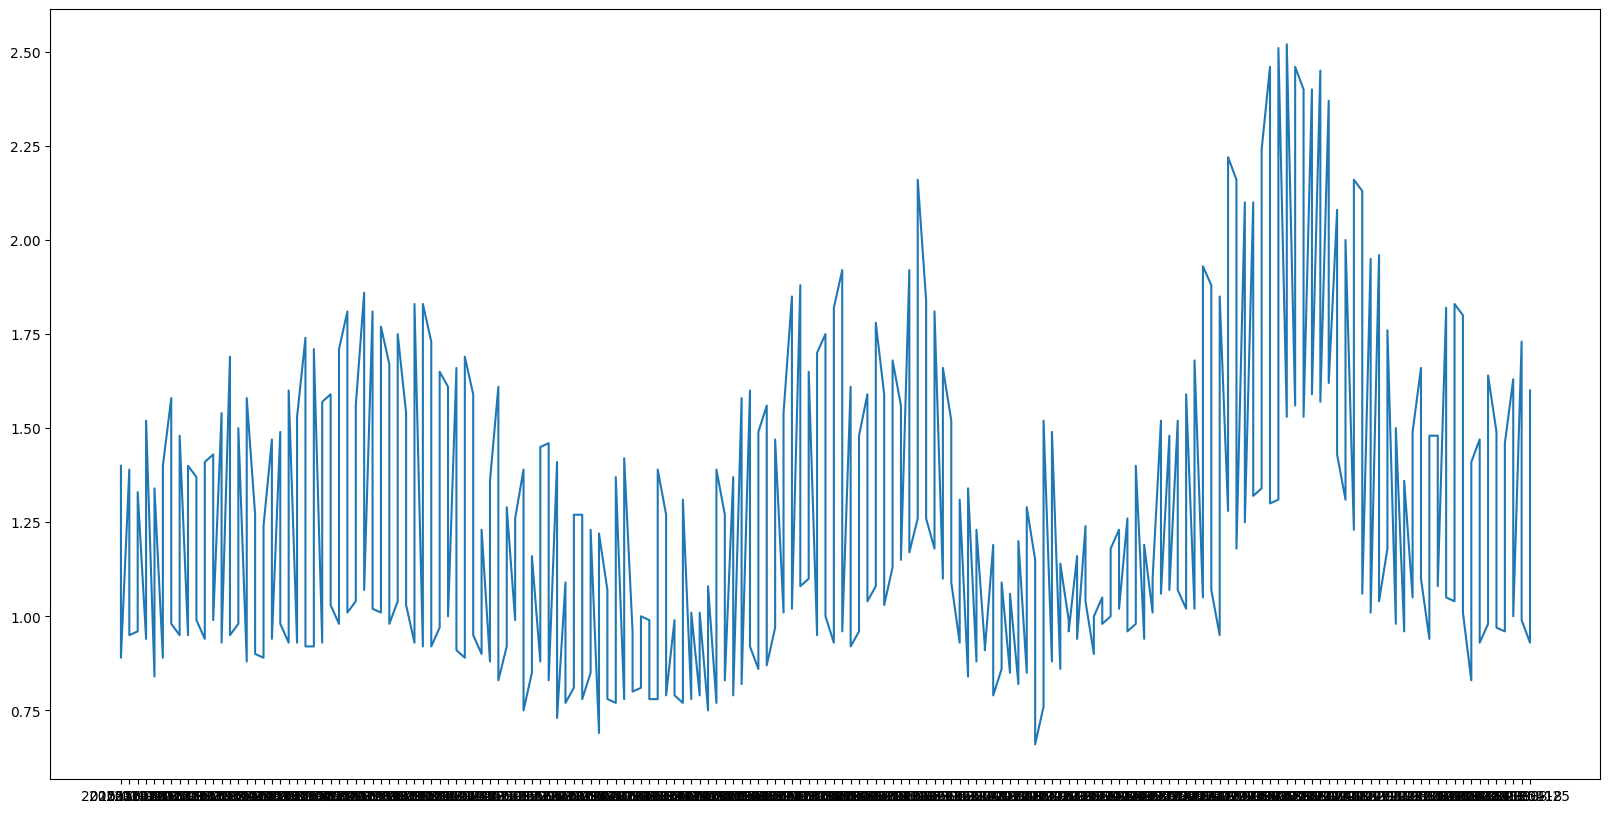

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df_wst['ds'],df_wst['y'])

In [19]:
m = Prophet()
m.fit(df_wst)

00:31:50 - cmdstanpy - INFO - Chain [1] start processing
00:31:50 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.286863,0.665508,1.550077,1.286863,1.286863,-0.189013,-0.189013,-0.189013,-0.189013,-0.189013,-0.189013,0.0,0.0,0.0,1.097850
1,2015-01-11,1.284615,0.692506,1.534925,1.284615,1.284615,-0.173488,-0.173488,-0.173488,-0.173488,-0.173488,-0.173488,0.0,0.0,0.0,1.111127
2,2015-01-18,1.282367,0.688655,1.534559,1.282367,1.282367,-0.165033,-0.165033,-0.165033,-0.165033,-0.165033,-0.165033,0.0,0.0,0.0,1.117334
3,2015-01-25,1.280119,0.670883,1.489635,1.280119,1.280119,-0.176310,-0.176310,-0.176310,-0.176310,-0.176310,-0.176310,0.0,0.0,0.0,1.103808
4,2015-02-01,1.277871,0.656171,1.494761,1.277871,1.277871,-0.197359,-0.197359,-0.197359,-0.197359,-0.197359,-0.197359,0.0,0.0,0.0,1.080511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.726013,1.065558,1.953201,1.691793,1.764486,-0.209072,-0.209072,-0.209072,-0.209072,-0.209072,-0.209072,0.0,0.0,0.0,1.516941
530,2019-03-22,1.726573,1.082860,1.948351,1.692201,1.765333,-0.204004,-0.204004,-0.204004,-0.204004,-0.204004,-0.204004,0.0,0.0,0.0,1.522569
531,2019-03-23,1.727134,1.121940,1.949636,1.692617,1.766178,-0.198361,-0.198361,-0.198361,-0.198361,-0.198361,-0.198361,0.0,0.0,0.0,1.528772
532,2019-03-24,1.727694,1.104027,1.993967,1.693037,1.766946,-0.192247,-0.192247,-0.192247,-0.192247,-0.192247,-0.192247,0.0,0.0,0.0,1.535447


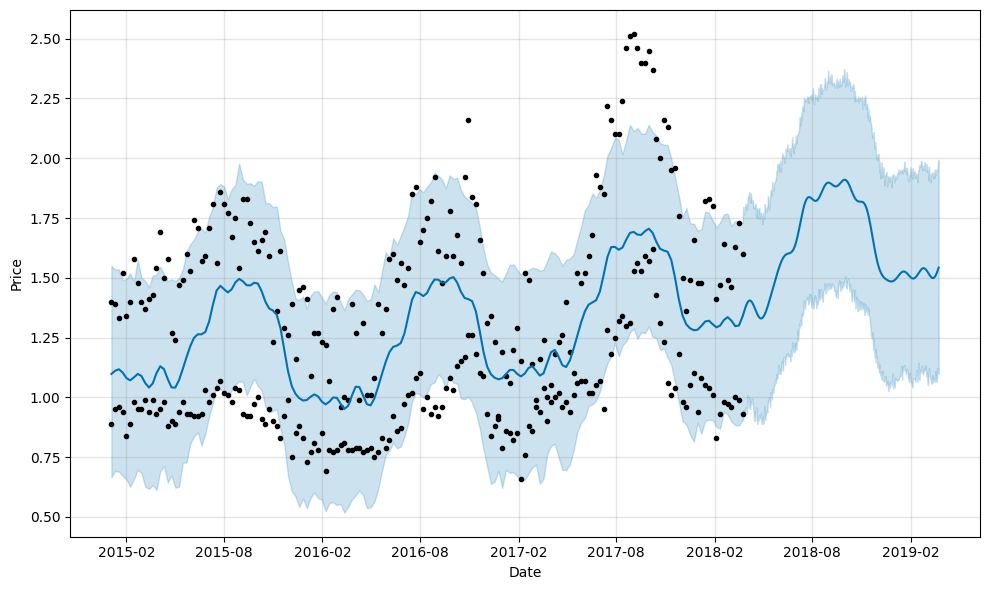

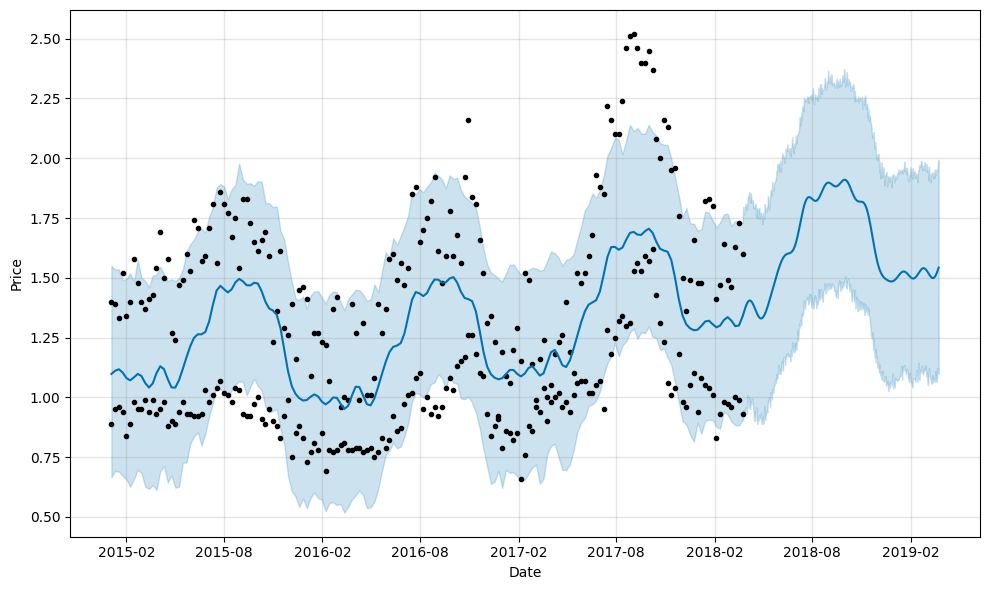

In [22]:
m.plot(forecast,xlabel='Date',ylabel='Price')